In [45]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = QasmSimulator()

from enum import Enum
class BellStates(Enum):
    PhiPlus=0
    PhiMinus=1
    PsiPlus=2
    PsiMinus=3

def getBellCircuit(thestate):
    # Create a Quantum Circuit acting on the q register
    # Only 2 qubits here, will not measure
    circuit = QuantumCircuit(2)
    
    # Define the relevant phase flips
    if thestate in [BellStates.PhiMinus,BellStates.PsiMinus]:
        circuit.x(0)
    if thestate in [BellStates.PsiPlus, BellStates.PsiMinus]:
        circuit.x(1)

    # Add a H gate on qubit 0
    circuit.h(0)
    # Add a CX (CNOT) gate on control qubit 0 and target qubit 1
    circuit.cx(0, 1)

    return circuit

In [46]:
thestate = BellStates.PsiMinus
circuit = getBellCircuit(thestate)
# Draw the circuit
circuit.draw()

┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ X ├─────┤ X ├
     └───┘     └───┘

<IPython.core.display.Latex object>

/Users/khoo/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


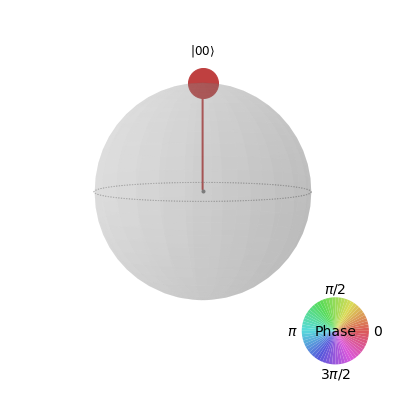

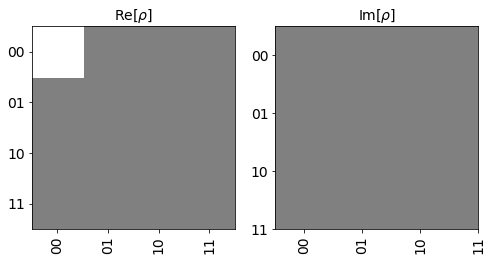

In [47]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**2)

# Draw a few representations of the state
display(state.draw('latex'))
display(state.draw('qsphere'))
display(state.draw('hinton'))

<IPython.core.display.Latex object>

/Users/khoo/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


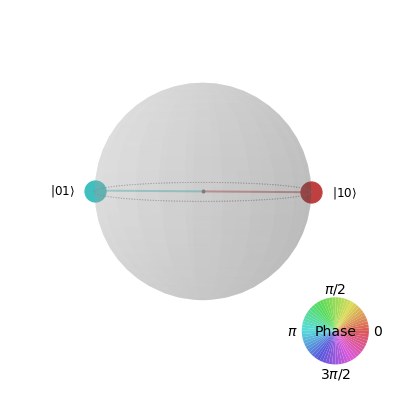

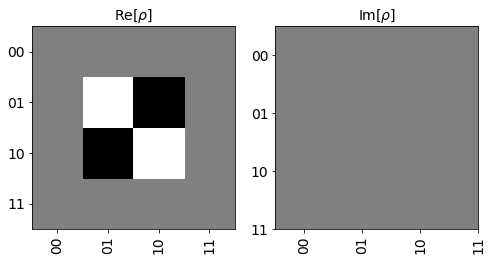

In [44]:
# Evolve the state by the quantum circuit
state = state.evolve(circuit)

# Draw again
display(state.draw('latex'))
display(state.draw('qsphere'))
display(state.draw('hinton'))

In [38]:
from qiskit.quantum_info import Operator
U = Operator(circuit)
# Show the results
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
         0.        +0.j]])